# imbalanced data

김보람  
2023-04-12

# ref

-   https://imbalanced-learn.org/stable/references/index.html#api

-   https://towardsdatascience.com/imbalanced-classification-in-python-smote-tomek-links-method-6e48dfe69bbc

-   https://www.kaggle.com/code/rafjaa/resampling-strategies-for-imbalanced-datasets/notebook

![](https://raw.githubusercontent.com/rafjaa/machine_learning_fecib/master/src/static/img/resampling.png)

# imbalanced data

## Generate the dataset

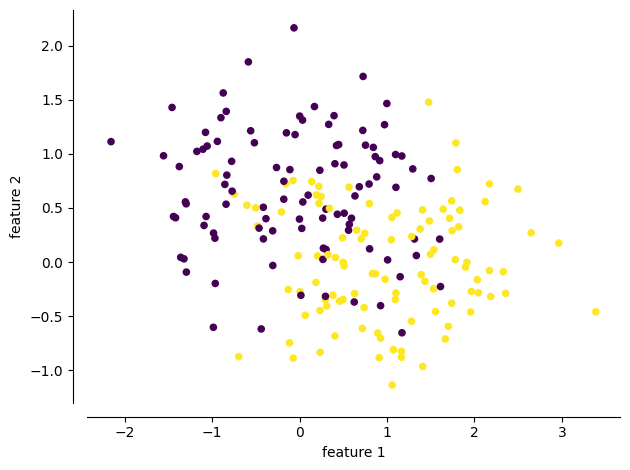

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, shuffle=True, noise=0.5, random_state=10)
X = pd.DataFrame(X, columns=["feature 1", "feature 2"])
ax = X.plot.scatter(
    x="feature 1",
    y="feature 2",
    c=y,
    colormap="viridis",
    colorbar=False,
)
sns.despine(ax=ax, offset=10)
plt.tight_layout()

## Make a dataset imbalanced

In [10]:
# pip install imblearn


In [11]:
from collections import Counter


def ratio_func(y, multiplier, minority_class):
    target_stats = Counter(y)
    return {minority_class: int(multiplier * target_stats[minority_class])}

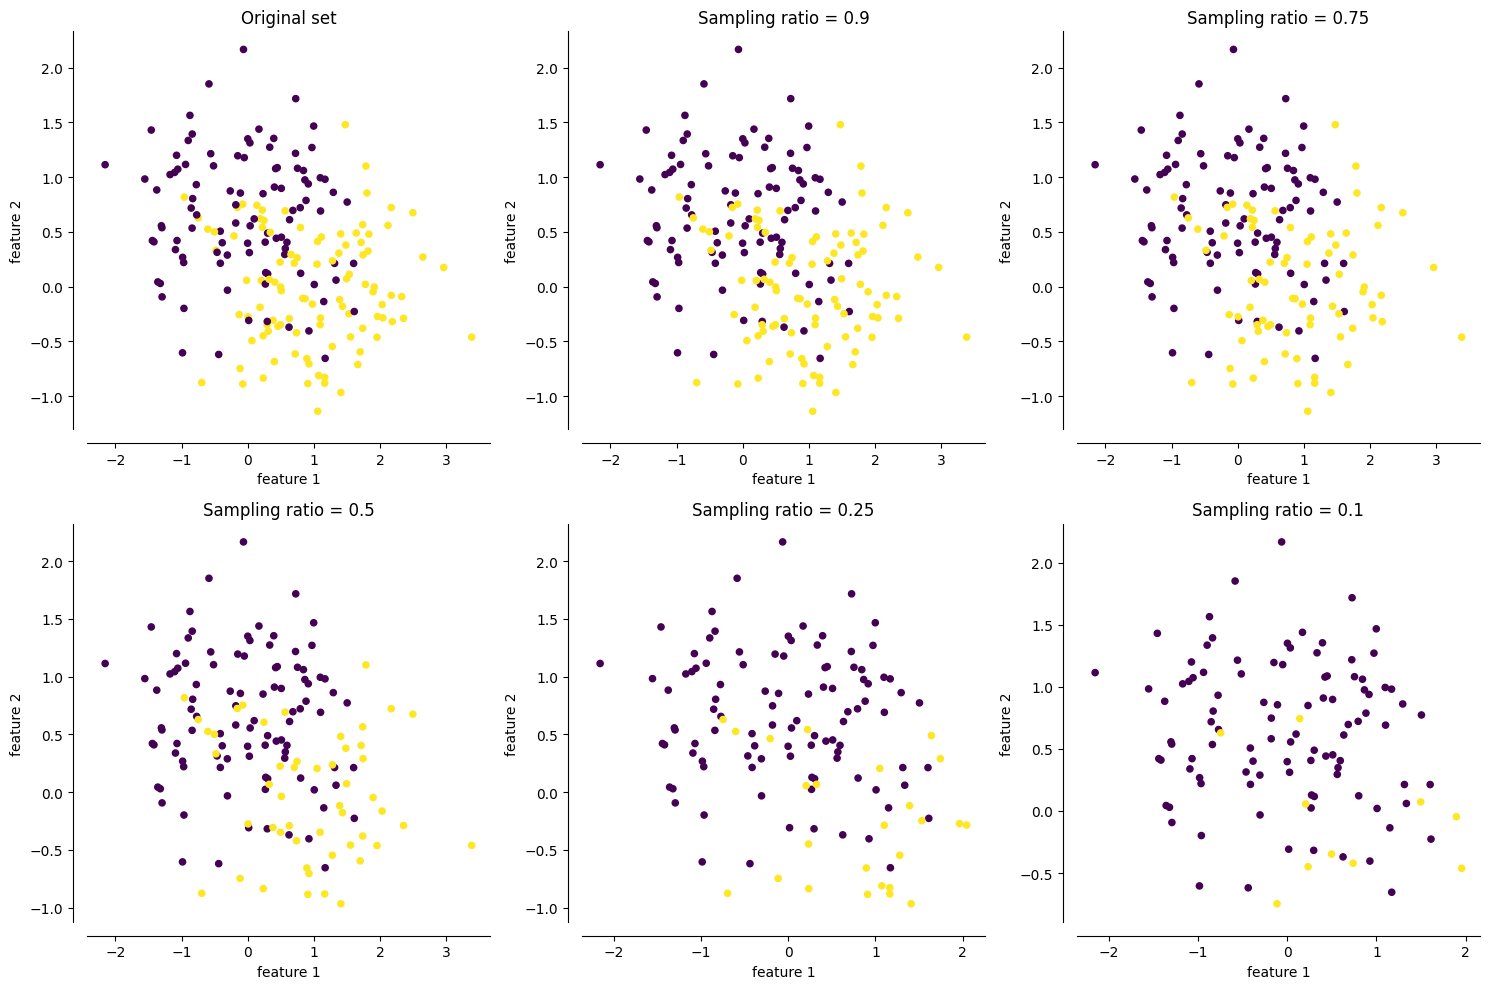

In [12]:
from imblearn.datasets import make_imbalance

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

X.plot.scatter(
    x="feature 1",
    y="feature 2",
    c=y,
    ax=axs[0, 0],
    colormap="viridis",
    colorbar=False,
)
axs[0, 0].set_title("Original set")
sns.despine(ax=axs[0, 0], offset=10)

multipliers = [0.9, 0.75, 0.5, 0.25, 0.1]
for ax, multiplier in zip(axs.ravel()[1:], multipliers):
    X_resampled, y_resampled = make_imbalance(
        X,
        y,
        sampling_strategy=ratio_func,
        **{"multiplier": multiplier, "minority_class": 1},
    )
    X_resampled.plot.scatter(
        x="feature 1",
        y="feature 2",
        c=y_resampled,
        ax=ax,
        colormap="viridis",
        colorbar=False,
    )
    ax.set_title(f"Sampling ratio = {multiplier}")
    sns.despine(ax=ax, offset=10)

plt.tight_layout()
plt.show()

# over-sampling

## Effect of the shrinkage factor in random over-sampling

In [13]:
from collections import Counter

from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_redundant=0,
    weights=[0.1, 0.9],
    random_state=0,
)
Counter(y)

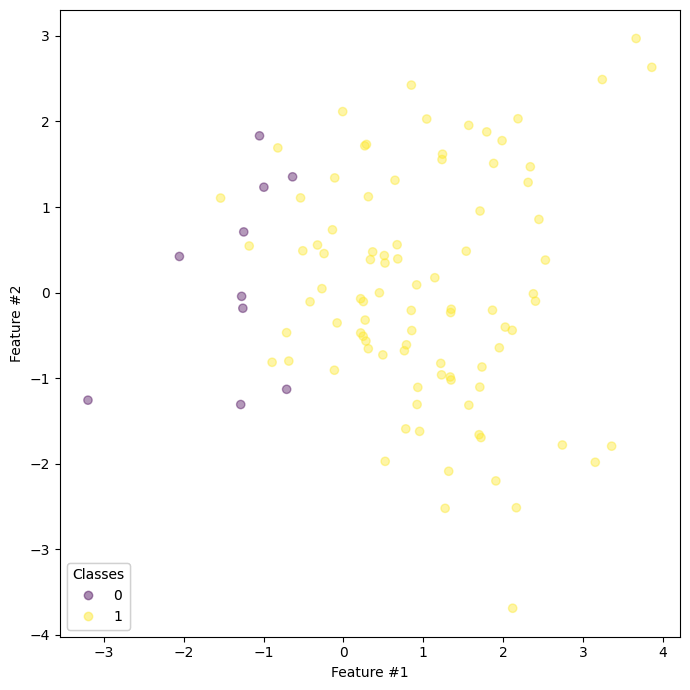

In [14]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7, 7))
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.4)
class_legend = ax.legend(*scatter.legend_elements(), loc="lower left", title="Classes")
ax.add_artist(class_legend)
ax.set_xlabel("Feature #1")
_ = ax.set_ylabel("Feature #2")
plt.tight_layout()


In [15]:
from imblearn.over_sampling import RandomOverSampler

sampler = RandomOverSampler(random_state=0)
X_res, y_res = sampler.fit_resample(X, y)
Counter(y_res)

-   부트스트랩 사용

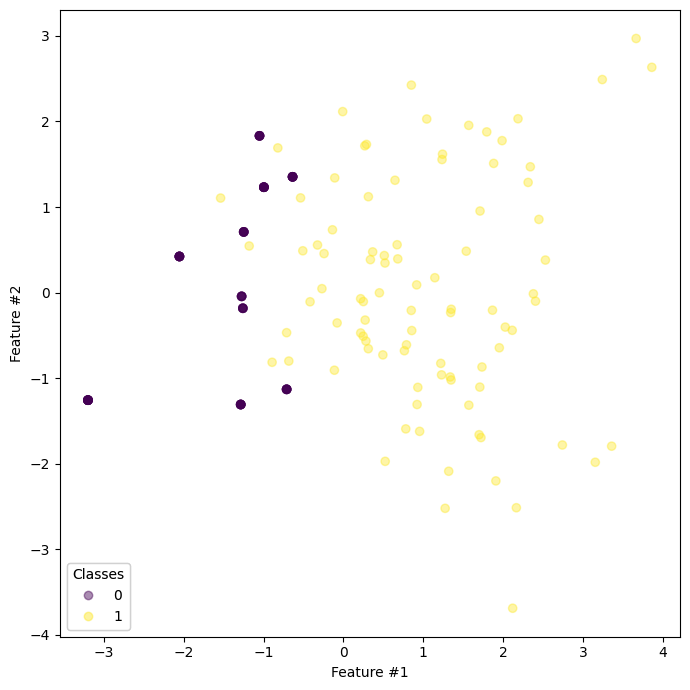

In [16]:
fig, ax = plt.subplots(figsize=(7, 7))
scatter = plt.scatter(X_res[:, 0], X_res[:, 1], c=y_res, alpha=0.4)
class_legend = ax.legend(*scatter.legend_elements(), loc="lower left", title="Classes")
ax.add_artist(class_legend)
ax.set_xlabel("Feature #1")
_ = ax.set_ylabel("Feature #2")
plt.tight_layout()

In [17]:
sampler = RandomOverSampler(shrinkage=1, random_state=0)
X_res, y_res = sampler.fit_resample(X, y)
Counter(y_res)

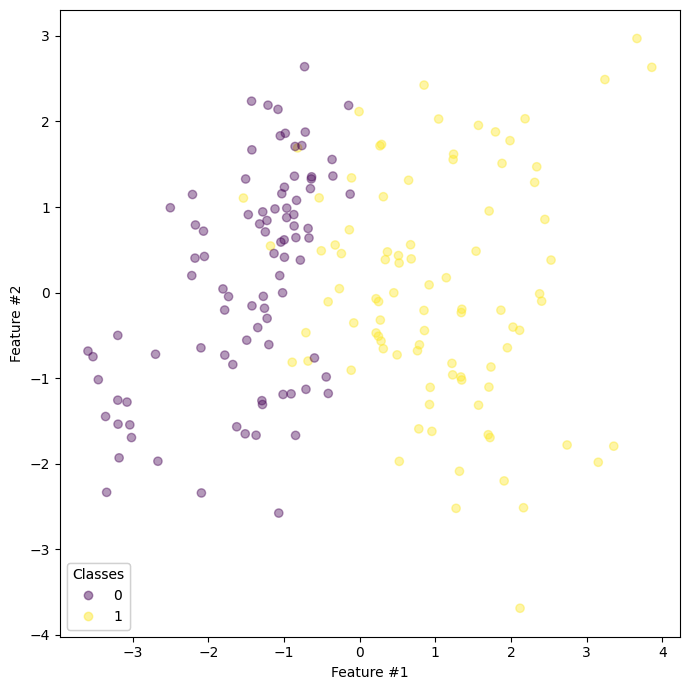

In [18]:
fig, ax = plt.subplots(figsize=(7, 7))
scatter = plt.scatter(X_res[:, 0], X_res[:, 1], c=y_res, alpha=0.4)
class_legend = ax.legend(*scatter.legend_elements(), loc="lower left", title="Classes")
ax.add_artist(class_legend)
ax.set_xlabel("Feature #1")
_ = ax.set_ylabel("Feature #2")
plt.tight_layout()

In [19]:
sampler = RandomOverSampler(shrinkage=3, random_state=0)
X_res, y_res = sampler.fit_resample(X, y)
Counter(y_res)

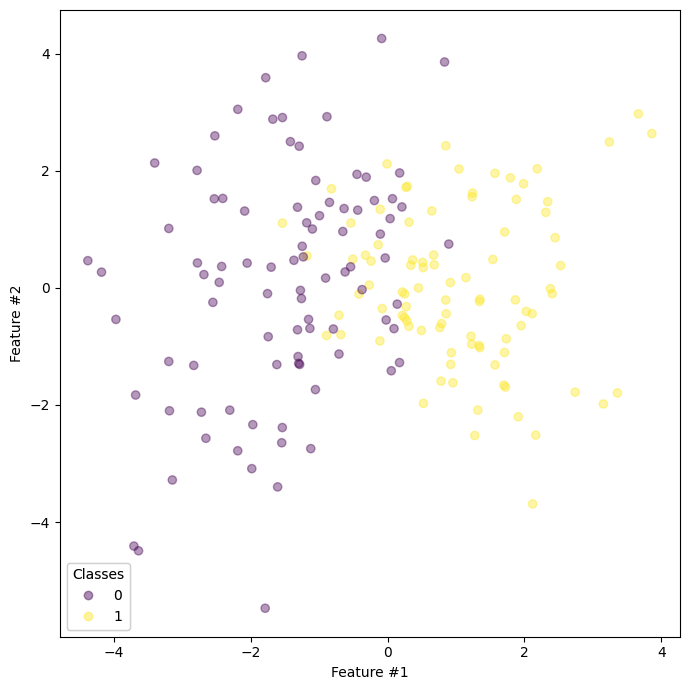

In [20]:
fig, ax = plt.subplots(figsize=(7, 7))
scatter = plt.scatter(X_res[:, 0], X_res[:, 1], c=y_res, alpha=0.4)
class_legend = ax.legend(*scatter.legend_elements(), loc="lower left", title="Classes")
ax.add_artist(class_legend)
ax.set_xlabel("Feature #1")
_ = ax.set_ylabel("Feature #2")
plt.tight_layout()

In [21]:
sampler = RandomOverSampler(shrinkage=0, random_state=0)
X_res, y_res = sampler.fit_resample(X, y)
Counter(y_res)

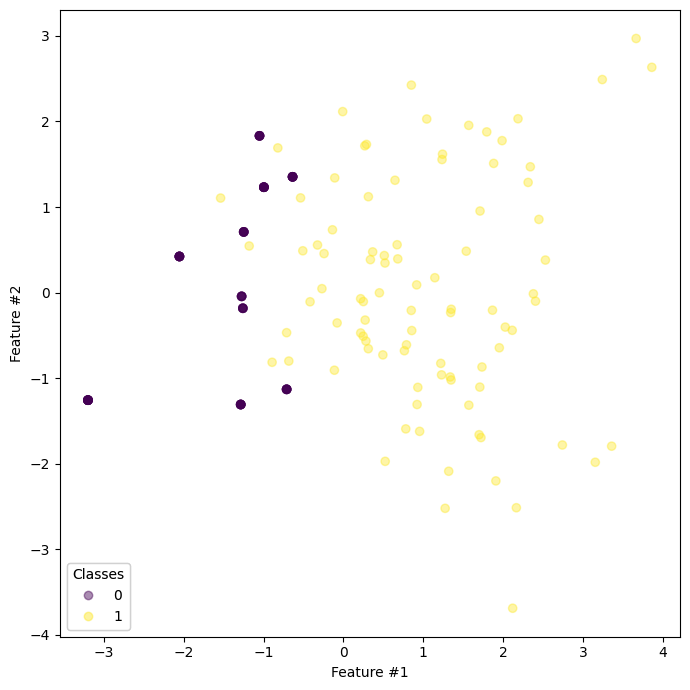

In [22]:
fig, ax = plt.subplots(figsize=(7, 7))
scatter = plt.scatter(X_res[:, 0], X_res[:, 1], c=y_res, alpha=0.4)
class_legend = ax.legend(*scatter.legend_elements(), loc="lower left", title="Classes")
ax.add_artist(class_legend)
ax.set_xlabel("Feature #1")
_ = ax.set_ylabel("Feature #2")
plt.tight_layout()

## Sample generator used in SMOTE-like samplers

Automatically created module for IPython interactive environment

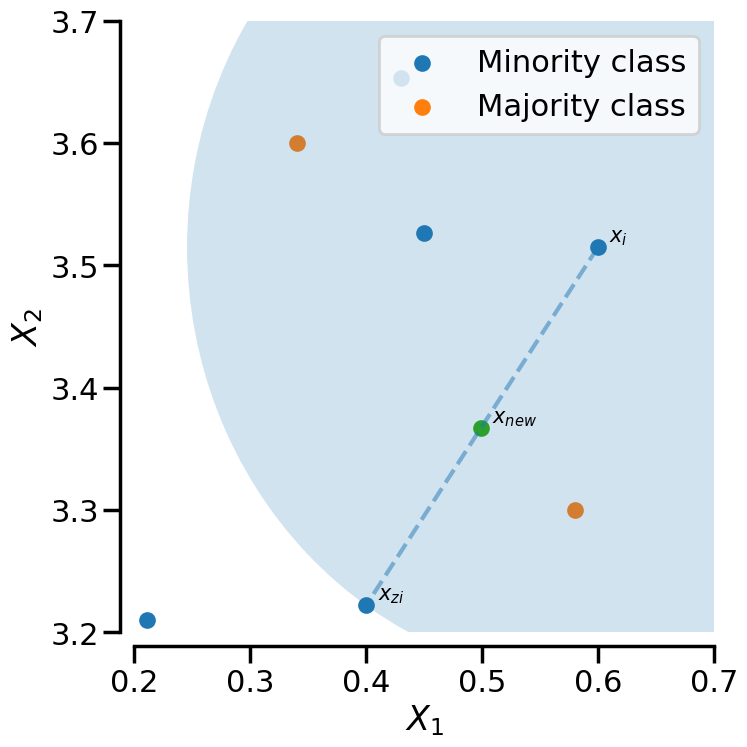

In [23]:
print(__doc__)

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_context("poster")

rng = np.random.RandomState(18)

f, ax = plt.subplots(figsize=(8, 8))

# generate some data points
y = np.array([3.65284, 3.52623, 3.51468, 3.22199, 3.21])
z = np.array([0.43, 0.45, 0.6, 0.4, 0.211])
y_2 = np.array([3.3, 3.6])
z_2 = np.array([0.58, 0.34])

# plot the majority and minority samples
ax.scatter(z, y, label="Minority class", s=100)
ax.scatter(z_2, y_2, label="Majority class", s=100)

idx = rng.randint(len(y), size=2)
annotation = [r"$x_i$", r"$x_{zi}$"]

for a, i in zip(annotation, idx):
    ax.annotate(a, (z[i], y[i]), xytext=tuple([z[i] + 0.01, y[i] + 0.005]), fontsize=15)

# draw the circle in which the new sample will generated
radius = np.sqrt((z[idx[0]] - z[idx[1]]) ** 2 + (y[idx[0]] - y[idx[1]]) ** 2)
circle = plt.Circle((z[idx[0]], y[idx[0]]), radius=radius, alpha=0.2)
ax.add_artist(circle)

# plot the line on which the sample will be generated
ax.plot(z[idx], y[idx], "--", alpha=0.5)

# create and plot the new sample
step = rng.uniform()
y_gen = y[idx[0]] + step * (y[idx[1]] - y[idx[0]])
z_gen = z[idx[0]] + step * (z[idx[1]] - z[idx[0]])

ax.scatter(z_gen, y_gen, s=100)
ax.annotate(
    r"$x_{new}$",
    (z_gen, y_gen),
    xytext=tuple([z_gen + 0.01, y_gen + 0.005]),
    fontsize=15,
)

# make the plot nicer with legend and label
sns.despine(ax=ax, offset=10)
ax.set_xlim([0.2, 0.7])
ax.set_ylim([3.2, 3.7])
plt.xlabel(r"$X_1$")
plt.ylabel(r"$X_2$")
plt.legend()
plt.tight_layout()
plt.show()

# under-sampling

## Illustration of the definition of a Tomek link

In [24]:
print(__doc__)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("poster")

Automatically created module for IPython interactive environment

In [25]:
def make_plot_despine(ax):
    sns.despine(ax=ax, offset=10)
    ax.set_xlim([0, 3])
    ax.set_ylim([0, 3])
    ax.set_xlabel(r"$X_1$")
    ax.set_ylabel(r"$X_2$")
    ax.legend(loc="lower right")

In [26]:
import numpy as np

rng = np.random.RandomState(18)

X_minority = np.transpose(
    [[1.1, 1.3, 1.15, 0.8, 0.55, 2.1], [1.0, 1.5, 1.7, 2.5, 0.55, 1.9]]
)
X_majority = np.transpose(
    [
        [2.1, 2.12, 2.13, 2.14, 2.2, 2.3, 2.5, 2.45],
        [1.5, 2.1, 2.7, 0.9, 1.0, 1.4, 2.4, 2.9],
    ]
)

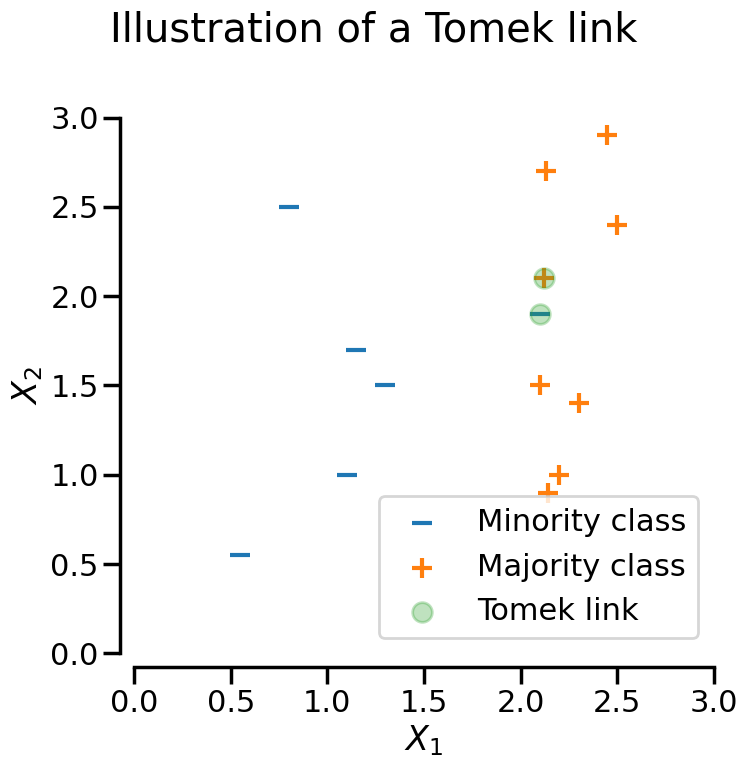

In [27]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(
    X_minority[:, 0],
    X_minority[:, 1],
    label="Minority class",
    s=200,
    marker="_",
)
ax.scatter(
    X_majority[:, 0],
    X_majority[:, 1],
    label="Majority class",
    s=200,
    marker="+",
)

# highlight the samples of interest
ax.scatter(
    [X_minority[-1, 0], X_majority[1, 0]],
    [X_minority[-1, 1], X_majority[1, 1]],
    label="Tomek link",
    s=200,
    alpha=0.3,
)
make_plot_despine(ax)
fig.suptitle("Illustration of a Tomek link")
fig.tight_layout()

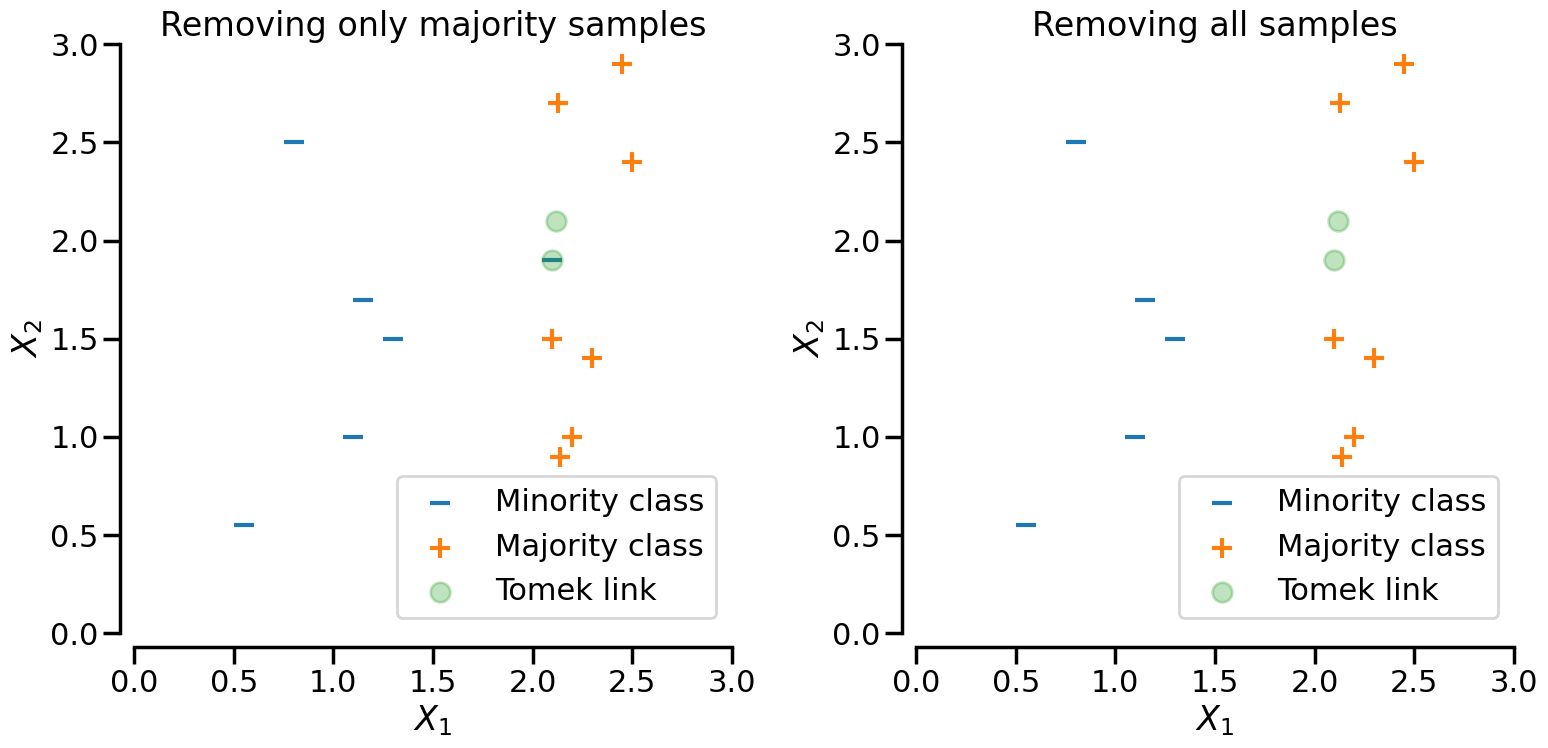

In [28]:
from imblearn.under_sampling import TomekLinks

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

samplers = {
    "Removing only majority samples": TomekLinks(sampling_strategy="auto"),
    "Removing all samples": TomekLinks(sampling_strategy="all"),
}

for ax, (title, sampler) in zip(axs, samplers.items()):
    X_res, y_res = sampler.fit_resample(
        np.vstack((X_minority, X_majority)),
        np.array([0] * X_minority.shape[0] + [1] * X_majority.shape[0]),
    )
    ax.scatter(
        X_res[y_res == 0][:, 0],
        X_res[y_res == 0][:, 1],
        label="Minority class",
        s=200,
        marker="_",
    )
    ax.scatter(
        X_res[y_res == 1][:, 0],
        X_res[y_res == 1][:, 1],
        label="Majority class",
        s=200,
        marker="+",
    )

    # highlight the samples of interest
    ax.scatter(
        [X_minority[-1, 0], X_majority[1, 0]],
        [X_minority[-1, 1], X_majority[1, 1]],
        label="Tomek link",
        s=200,
        alpha=0.3,
    )

    ax.set_title(title)
    make_plot_despine(ax)
fig.tight_layout()

plt.show()


## Sample selection in NearMiss

In [29]:
print(__doc__)

import seaborn as sns

sns.set_context("poster")

Automatically created module for IPython interactive environment

In [30]:
def make_plot_despine(ax):
    sns.despine(ax=ax, offset=10)
    ax.set_xlim([0, 3.5])
    ax.set_ylim([0, 3.5])
    ax.set_xticks(np.arange(0, 3.6, 0.5))
    ax.set_yticks(np.arange(0, 3.6, 0.5))
    ax.set_xlabel(r"$X_1$")
    ax.set_ylabel(r"$X_2$")
    ax.legend(loc="upper left", fontsize=16)

In [31]:
import numpy as np

rng = np.random.RandomState(18)

X_minority = np.transpose(
    [[1.1, 1.3, 1.15, 0.8, 0.8, 0.6, 0.55], [1.0, 1.5, 1.7, 2.5, 2.0, 1.2, 0.55]]
)
X_majority = np.transpose(
    [
        [2.1, 2.12, 2.13, 2.14, 2.2, 2.3, 2.5, 2.45],
        [1.5, 2.1, 2.7, 0.9, 1.0, 1.4, 2.4, 2.9],
    ]
)

### NearMiss-1

-   가장 가까운 이웃의 평균 거리가 가장 작은 다수 클래스에서 표본 선택

-   3-NN사용하여 특정 샘플 2개에 대한 평균 거리 계산

-   평균거리가 더 작아 녹색 점선으로 연결된 점 선택

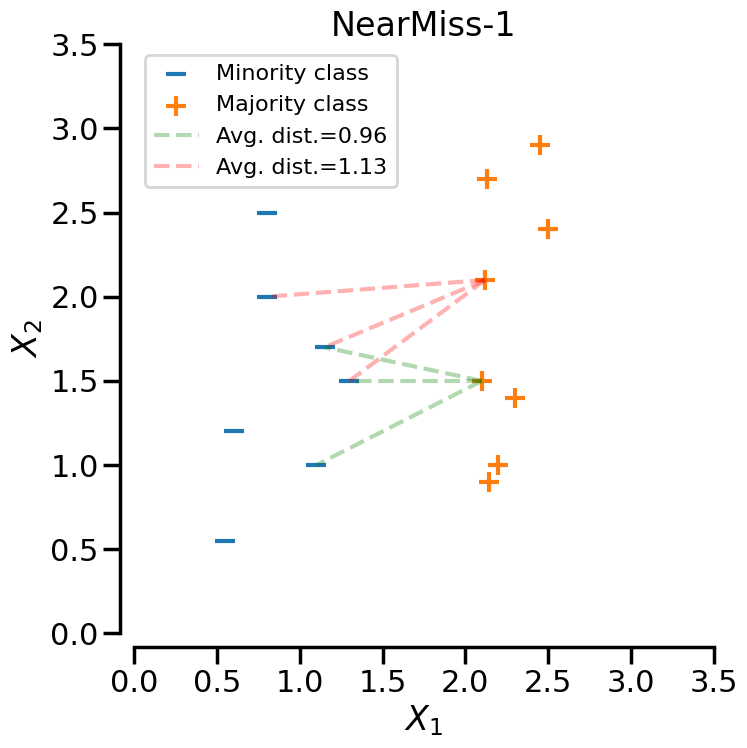

In [32]:
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(
    X_minority[:, 0],
    X_minority[:, 1],
    label="Minority class",
    s=200,
    marker="_",
)
ax.scatter(
    X_majority[:, 0],
    X_majority[:, 1],
    label="Majority class",
    s=200,
    marker="+",
)

nearest_neighbors = NearestNeighbors(n_neighbors=3)
nearest_neighbors.fit(X_minority)
dist, ind = nearest_neighbors.kneighbors(X_majority[:2, :])
dist_avg = dist.sum(axis=1) / 3

for positive_idx, (neighbors, distance, color) in enumerate(
    zip(ind, dist_avg, ["g", "r"])
):
    for make_plot, sample_idx in enumerate(neighbors):
        ax.plot(
            [X_majority[positive_idx, 0], X_minority[sample_idx, 0]],
            [X_majority[positive_idx, 1], X_minority[sample_idx, 1]],
            "--" + color,
            alpha=0.3,
            label=f"Avg. dist.={distance:.2f}" if make_plot == 0 else "",
        )
ax.set_title("NearMiss-1")
make_plot_despine(ax)
plt.tight_layout()

### NearMiss-2

-   가장 먼 이웃의 평균 거리가 가장 작은 샘플 선택

-   멀리 있는 세 이웃의 거리가 가장 작은 녹색 점 선택

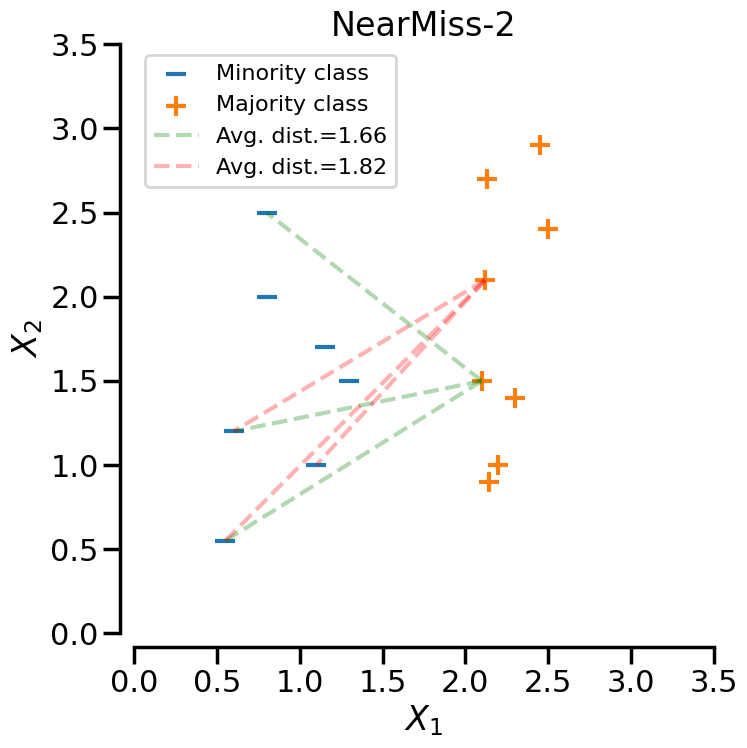

In [33]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(
    X_minority[:, 0],
    X_minority[:, 1],
    label="Minority class",
    s=200,
    marker="_",
)
ax.scatter(
    X_majority[:, 0],
    X_majority[:, 1],
    label="Majority class",
    s=200,
    marker="+",
)

nearest_neighbors = NearestNeighbors(n_neighbors=X_minority.shape[0])
nearest_neighbors.fit(X_minority)
dist, ind = nearest_neighbors.kneighbors(X_majority[:2, :])
dist = dist[:, -3::]
ind = ind[:, -3::]
dist_avg = dist.sum(axis=1) / 3

for positive_idx, (neighbors, distance, color) in enumerate(
    zip(ind, dist_avg, ["g", "r"])
):
    for make_plot, sample_idx in enumerate(neighbors):
        ax.plot(
            [X_majority[positive_idx, 0], X_minority[sample_idx, 0]],
            [X_majority[positive_idx, 1], X_minority[sample_idx, 1]],
            "--" + color,
            alpha=0.3,
            label=f"Avg. dist.={distance:.2f}" if make_plot == 0 else "",
        )
ax.set_title("NearMiss-2")
make_plot_despine(ax)
plt.tight_layout()

### NearMiss-3

-   가장 가까운 이웃은 다수 클래스의 샘플을 short-list 하는데 사용

-   가장 가까운 이웃의 평균 거리가 가장 큰 표본 선택

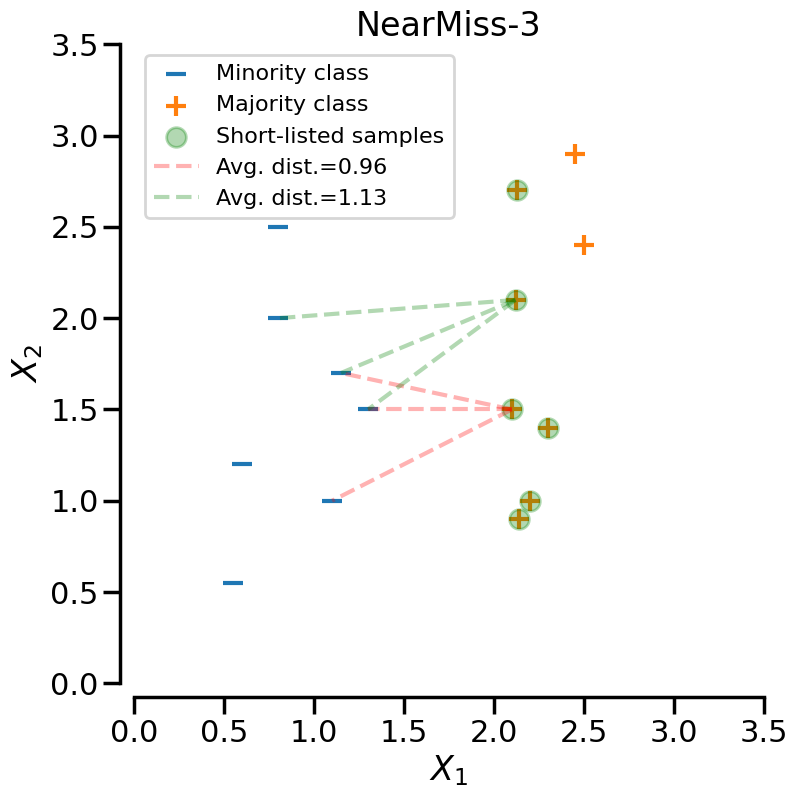

In [34]:
fig, ax = plt.subplots(figsize=(8.5, 8.5))
ax.scatter(
    X_minority[:, 0],
    X_minority[:, 1],
    label="Minority class",
    s=200,
    marker="_",
)
ax.scatter(
    X_majority[:, 0],
    X_majority[:, 1],
    label="Majority class",
    s=200,
    marker="+",
)

nearest_neighbors = NearestNeighbors(n_neighbors=3)
nearest_neighbors.fit(X_majority)

# select only the majority point of interest
selected_idx = nearest_neighbors.kneighbors(X_minority, return_distance=False)
X_majority = X_majority[np.unique(selected_idx), :]
ax.scatter(
    X_majority[:, 0],
    X_majority[:, 1],
    label="Short-listed samples",
    s=200,
    alpha=0.3,
    color="g",
)
nearest_neighbors = NearestNeighbors(n_neighbors=3)
nearest_neighbors.fit(X_minority)
dist, ind = nearest_neighbors.kneighbors(X_majority[:2, :])
dist_avg = dist.sum(axis=1) / 3

for positive_idx, (neighbors, distance, color) in enumerate(
    zip(ind, dist_avg, ["r", "g"])
):
    for make_plot, sample_idx in enumerate(neighbors):
        ax.plot(
            [X_majority[positive_idx, 0], X_minority[sample_idx, 0]],
            [X_majority[positive_idx, 1], X_minority[sample_idx, 1]],
            "--" + color,
            alpha=0.3,
            label=f"Avg. dist.={distance:.2f}" if make_plot == 0 else "",
        )
ax.set_title("NearMiss-3")
make_plot_despine(ax)
plt.tight_layout()
plt.show()